In [1]:
import torch
import os

In [2]:
best_model_path = "/home/marjanalbooyeh/code/ML_LJ/ML_LJ_framework/flow/workspace/2458f7da93d2f720de8ca72efe20efa8"

In [3]:
import sys

sys.path.append('..')

In [4]:
from model import NN

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
model = NN(in_dim=3, hidden_dim=32, out_dim=1,n_layers=2, act_fn="Tanh", dropout=0.5, inp_mode="r")

In [7]:
model.load_state_dict(torch.load(os.path.join(best_model_path, "best_model.pth")))

<All keys matched successfully>

In [8]:
model.to(device)

NN(
  (net): Sequential(
    (0): Linear(in_features=4, out_features=32, bias=True)
    (1): Tanh()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): Tanh()
    (4): Dropout(p=0.5, inplace=False)
    (5): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [ ]:
for name, param in model.named_parameters():
    break

In [105]:
torch.sum(torch.transpose(param, 0, 1), dim=-1)

tensor([-1.1245e-02,  5.9183e-04, -8.8519e-03,  1.1639e+01], device='cuda:0',
       grad_fn=<SumBackward1>)

In [106]:
for name, param_pos in model_pos.named_parameters():
    break

In [107]:
torch.sum(torch.transpose(param_pos, 0, 1), dim=-1)

tensor([-61.7747,  72.2368,  42.9895], device='cuda:0', grad_fn=<SumBackward1>)

In [9]:
from data_loader import load_datasets

In [10]:
data_path=  "/home/marjanalbooyeh/code/ML_LJ/datasets/single_particle"
train_dataloader, valid_dataloader, test_dataloader = load_datasets(data_path, 20)

In [11]:
r_ml = []
energies_ml = []
forces_ml = []

In [12]:

model.eval()
for (features, target) in train_dataloader:
    features = features.to(device)
    features.requires_grad=True
    energy = model(features)
    force = torch.autograd.grad(energy, features, retain_graph=True, create_graph=True,
                                                       grad_outputs=torch.ones_like(energy))[0] * (-1)
    energies_ml.extend(energy.squeeze().tolist())
    r_ml.extend(torch.norm(features, dim=1).tolist())
    forces_ml.extend(force.tolist())

In [13]:
for (features, target) in valid_dataloader:
    features = features.to(device)
    features.requires_grad=True
    energy = model(features)
    force = torch.autograd.grad(energy, features, retain_graph=True, create_graph=True,
                                                       grad_outputs=torch.ones_like(energy))[0] * (-1)
    energies_ml.extend(energy.squeeze().tolist())
    r_ml.extend(torch.norm(features, dim=1).tolist())
    forces_ml.extend(force.tolist())

In [14]:
for (features, target) in test_dataloader:
    features = features.to(device)
    features.requires_grad=True
    energy = model(features)
    force = torch.autograd.grad(energy, features, retain_graph=True, create_graph=True,
                                                       grad_outputs=torch.ones_like(energy))[0] * (-1)
    energies_ml.extend(energy.squeeze().tolist())
    r_ml.extend(torch.norm(features, dim=1).tolist())
    forces_ml.extend(force.tolist())

## AA model

In [16]:
import gsd
import numpy as np

aa_data_path = "/home/marjanalbooyeh/code/cme-lab/hoomd-polymers/notebooks/"

r_aa = np.load(os.path.join(aa_data_path, "r.npy"))
energies_aa = np.load(os.path.join(aa_data_path, "energies.npy"))
forces_aa = np.load(os.path.join(aa_data_path, "forces.npy"))





In [17]:
import matplotlib.pyplot as plt

array([23.262207, 23.226368, 23.190577, ..., 21.53476 , 21.531181,
       21.527653], dtype=float32)

In [32]:
LJ = 4*(np.power(1/r_aa, 12) - np.power(1/r_aa, 6))

In [33]:
LJ

array([-0.6573909 , -0.65776527, -0.65813965, ..., -0.6762195 ,
       -0.6762603 , -0.6763004 ], dtype=float32)

In [39]:
np.min(energies_ml)

-3.5314412117004395

Text(0.5, 1.0, 'Energy vs r')

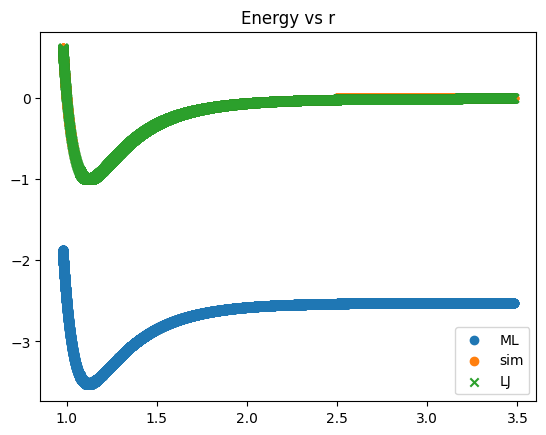

In [46]:
plt.scatter(r_ml, np.asarray(energies_ml), label="ML", marker="o")
plt.scatter(r_aa, np.asarray(energies_aa), label="sim")
plt.scatter(r_aa, LJ, label="LJ", marker="x")
plt.legend()
plt.title("Energy vs r")

In [26]:
forces_aa_norm = np.linalg.norm(forces_aa[:, 0, :], axis=1)

In [30]:
forces_ml_norm = np.linalg.norm(np.asarray(forces_ml), axis=1)

Text(0.5, 1.0, 'forces vs r')

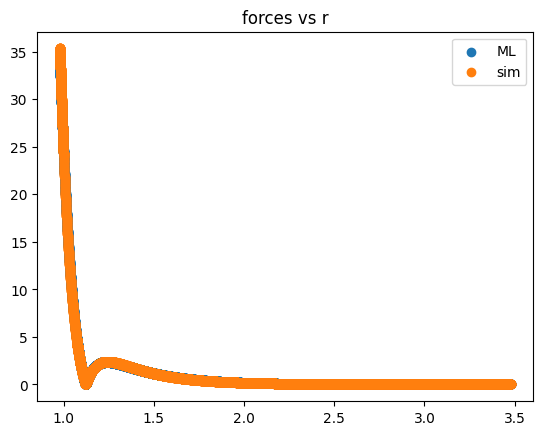

In [44]:
plt.scatter(r_ml, forces_ml_norm, label="ML")
plt.scatter(r_aa, forces_aa_norm, label="sim")
plt.legend()
plt.title("forces vs r")

In [47]:
best_model_path_pos = "/home/marjanalbooyeh/code/ML_LJ/ML_LJ_framework/flow/workspace/ff8c2d9800b7c8ea4a757e7488749491"


In [48]:
model_pos = NN(in_dim=3, hidden_dim=64, out_dim=1,n_layers=2, act_fn="Tanh", dropout=0.5, inp_mode="pos")
model_pos.load_state_dict(torch.load(os.path.join(best_model_path_pos, "best_model.pth")))

model_pos.to(device)

NN(
  (net): Sequential(
    (0): Linear(in_features=3, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
    (4): Dropout(p=0.5, inplace=False)
    (5): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [61]:
r_ml_pos = []
energies_ml_pos = []
forces_ml_pos = []


model_pos.eval()
for (features, target) in train_dataloader:
    features = features.to(device)
    features.requires_grad=True
    energy = model_pos(features)
    force = torch.autograd.grad(energy, features, retain_graph=True, create_graph=True,
                                                       grad_outputs=torch.ones_like(energy))[0] * (-1)
    energies_ml_pos.extend(energy.squeeze().tolist())
    r_ml_pos.extend(torch.norm(features, dim=1).tolist())
    forces_ml_pos.extend(force.tolist())

for (features, target) in valid_dataloader:
    features = features.to(device)
    features.requires_grad=True
    energy = model_pos(features)
    force = torch.autograd.grad(energy, features, retain_graph=True, create_graph=True,
                                                       grad_outputs=torch.ones_like(energy))[0] * (-1)
    energies_ml_pos.extend(energy.squeeze().tolist())
    r_ml_pos.extend(torch.norm(features, dim=1).tolist())
    forces_ml_pos.extend(force.tolist())


for (features, target) in test_dataloader:
    features = features.to(device)
    features.requires_grad=True
    energy = model_pos(features)
    force = torch.autograd.grad(energy, features, retain_graph=True, create_graph=True,
                                                       grad_outputs=torch.ones_like(energy))[0] * (-1)
    energies_ml_pos.extend(energy.squeeze().tolist())
    r_ml_pos.extend(torch.norm(features, dim=1).tolist())
    forces_ml_pos.extend(force.tolist())


In [62]:
forces_ml_norm_pos = np.linalg.norm(np.asarray(forces_ml_pos), axis=1) * np.prod(np.sign(np.asarray(forces_ml_pos)), axis=1)

In [71]:
forces_ml_norm = np.linalg.norm(np.asarray(forces_ml), axis=1)*np.prod(np.sign(np.asarray(forces_ml)), axis=1)

forces_aa_norm = np.linalg.norm(forces_aa[:, 0, :], axis=1) *np.prod(np.sign(forces_aa[:, 0, :]), axis=1)

Text(0.5, 1.0, 'forces vs r')

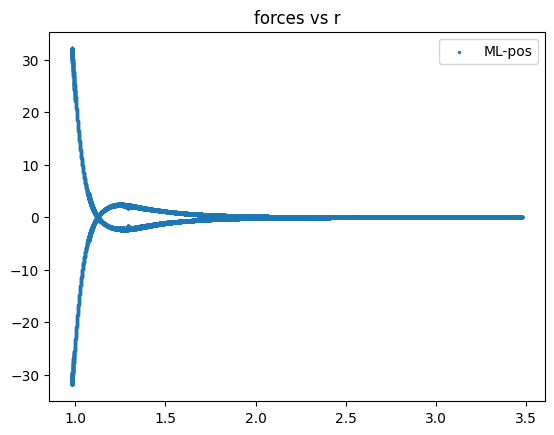

In [85]:
# plt.scatter(r_ml, forces_ml_norm, label="ML", s=2)
plt.scatter(r_ml_pos, forces_ml_norm_pos, label="ML-pos", s=2)
# plt.scatter(r_aa, forces_aa_norm, label="sim", s=2)
plt.legend()
plt.title("forces vs r")

Text(0.5, 1.0, 'Energy vs r')

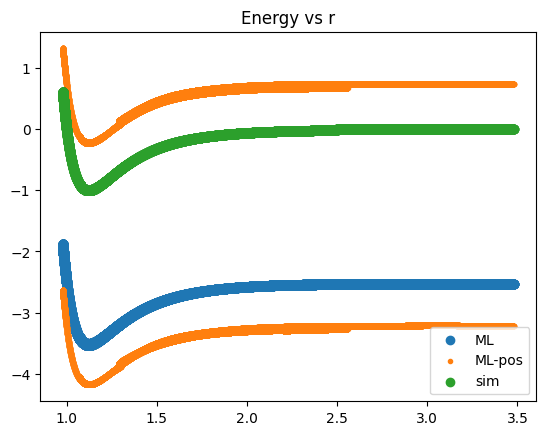

In [82]:
plt.scatter(r_ml, np.asarray(energies_ml), label="ML", marker="o")
plt.scatter(r_ml_pos, np.asarray(energies_ml_pos), label="ML-pos", marker=".")
plt.scatter(r_aa, np.asarray(energies_aa), label="sim")
# plt.scatter(r_aa, LJ, label="LJ", marker="x")
plt.legend()
plt.title("Energy vs r")